# Image Classification Using Convolutional Neural Network (CNN)

classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes available. We will use CNN for classification

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import numpy as np


In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [5]:
len(X_train)

50000

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_test.shape

(10000, 1)

In [9]:
y_train[:10]  # class number  0-9

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [10]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [11]:
X_train[0]   #0-49999  32*32*3  (32,32,3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [12]:
y_train[0]

array([6], dtype=uint8)

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [15]:
y_train = y_train.reshape(-1,) # converts 2D to 1D
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [16]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

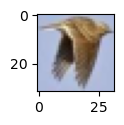

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5,1))
plt.imshow(X_train[123])

In [22]:
y_train[123]  

2

In [23]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [24]:
def plot_sample(X, y, index):
    plt.figure(figsize = (10,1))
    plt.imshow(X[index])  #x_train[1]
    plt.xlabel(classes[y[index]])  #classes(y_train[1])

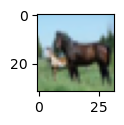

In [26]:
plt.figure(figsize = (10,1))
plt.imshow(X_train[12])

In [27]:
y_train[12]

7

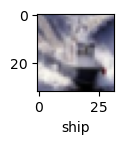

In [31]:
plot_sample(X_train, y_train, 1245)

In [32]:
y_train[1245]

8

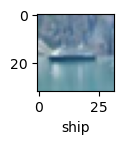

In [33]:
plot_sample(X_train, y_train, 456)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

# Normalizing the training data

In [34]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [35]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [36]:
ann = models.Sequential([
        #input_shape=3072
        layers.Flatten(input_shape=(32,32,3)), #(28,28,1)
    
        #input layer
        #no. of nodes for hidden layer1= 30
        layers.Dense(30, activation='relu'),
    
        #hidden layer 1
        #no. of nodes for hidden layer2=15
        layers.Dense(15, activation='relu'),
    
        #10 indicates no. of outcomes (classes 0-9)
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)  

Epoch 1/5
1563/1563 [==============================] - 11s 3ms/step - loss: 2.0858 - accuracy: 0.2183
Epoch 2/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8620 - accuracy: 0.3120
Epoch 3/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7965 - accuracy: 0.3425
Epoch 4/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7602 - accuracy: 0.3597
Epoch 5/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7390 - accuracy: 0.3660


In [37]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.7667 - accuracy: 0.3586


[1.7666736841201782, 0.358599990606308]

You can see that at the end of 5 epochs, accuracy is at around 35%

In [38]:
from sklearn.metrics import classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.33      0.40      1000
           1       0.49      0.49      0.49      1000
           2       0.24      0.18      0.20      1000
           3       0.23      0.24      0.23      1000
           4       0.33      0.17      0.23      1000
           5       0.32      0.38      0.34      1000
           6       0.29      0.70      0.41      1000
           7       0.52      0.26      0.34      1000
           8       0.49      0.30      0.38      1000
           9       0.41      0.54      0.47      1000

    accuracy                           0.36     10000
   macro avg       0.38      0.36      0.35     10000
weighted avg       0.38      0.36      0.35     10000



Now let us build a convolutional neural network to train our images

In [39]:
X_train.shape

(50000, 32, 32, 3)

In [40]:
cnn = models.Sequential([
    #feature extraction
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)), # (28,28,1)
    layers.MaxPooling2D(2, 2),
    
     layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    #classification 
    # dimension conversion
    layers.Flatten(),
    
    #input layer , no of nodes for hidden layer 1= 200
    layers.Dense(200, activation='sigmoid'),
    
    #hidden layer 1, no of nodes for hidden layer 2 =100
    layers.Dense(100, activation='sigmoid'),
    
    #hidden layer 2, outcomes= 10(0-9 classes)
    layers.Dense(10, activation='sigmoid')
])

In [41]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.5537 - accuracy: 0.4341
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.1777 - accuracy: 0.5810
Epoch 3/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.0273 - accuracy: 0.6370
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9175 - accuracy: 0.6787
Epoch 5/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8242 - accuracy: 0.7105
Epoch 6/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7417 - accuracy: 0.7412
Epoch 7/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.6653 - accuracy: 0.7671
Epoch 8/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.5925 - accuracy: 0.7940
Epoch 9/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.5214 - accuracy: 0.8199
Epoch 10/10
1563/1563 [==============================] - 35s 23m

#### With CNN, at the end 10 epochs, accuracy was at around 84% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [43]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.0346 - accuracy: 0.6849


[1.034562587738037, 0.6848999857902527]

In [44]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 5ms/step


array([[2.47694124e-02, 1.93417147e-01, 3.39026749e-01, 7.78361142e-01,
        1.17015906e-01, 2.08340824e-01, 7.55055770e-02, 1.21680889e-02,
        7.27340579e-02, 1.14628002e-01],
       [8.98708761e-01, 6.48105085e-01, 3.76760289e-02, 1.59465317e-02,
        5.36539499e-03, 1.31816196e-03, 1.53825840e-03, 5.02126873e-04,
        9.99527097e-01, 5.06278574e-01],
       [9.19960320e-01, 3.68270665e-01, 5.04460484e-02, 2.49151047e-02,
        4.72600712e-03, 5.53437462e-03, 1.23953097e-03, 5.83489146e-03,
        9.98258471e-01, 5.31915128e-01],
       [9.77911770e-01, 1.44884037e-02, 9.23128203e-02, 4.28647622e-02,
        4.08332080e-01, 1.16184745e-02, 2.51584896e-03, 5.63267246e-02,
        7.27687299e-01, 3.23771238e-01],
       [7.77716865e-04, 4.68367431e-03, 7.09185183e-01, 7.94551730e-01,
        9.58148479e-01, 1.15474656e-01, 9.93782759e-01, 1.68169895e-03,
        2.11576819e-02, 4.82891599e-04]], dtype=float32)

In [45]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [46]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

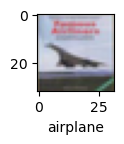

In [47]:
 plot_sample(X_test, y_test,3)

In [48]:
classes[y_classes[3]]

'airplane'

In [49]:
from sklearn.metrics import  classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 5ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.69      0.73      1000
           1       0.88      0.70      0.78      1000
           2       0.49      0.70      0.57      1000
           3       0.57      0.39      0.47      1000
           4       0.65      0.61      0.63      1000
           5       0.64      0.58      0.61      1000
           6       0.73      0.79      0.76      1000
           7       0.80      0.68      0.74      1000
           8       0.72      0.88      0.79      1000
           9       0.69      0.83      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [ ]:
# cifar 100
# MNIST  (28,28,1)

In [ ]:
# max 3 can be added in the resume
# image classification using CNN
# tensorflow keras numpy matplotlib
# description(max 3 line(related to coding))


# spam detection

# image classification of handwritten digits using ANN

# customer churn prediction using classification(decision tree,naive bayes,Knn) Ann


# basics of python
